 ## CH4 Spectra to do wavelength calibration and understand sensitvity tuning

### Workflow 

     1. initiate a 'Spectra' object
     2. add observer
     3. add gass_cells & gasses
     4. download data (runs the hapi functions)
     5. plot
    
    comment: the arguments of the gas_cell method are the default values as on spectracalc.com
             ! when using multiple gas cells, the spectra are calculated seperately and plotted on top of each other. (Not combined absorption as in spectracalc)

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
import os
os.chdir('..')
from classes import Spectra, Observer, HiddenPrints

In [2]:
%%capture
#%% 1. create a spectrum
my_spectrum = Spectra(name = 'CH4_STP')

#%% 2. add an observer
my_spectrum.observer = Observer(unit  = 'lam',      #'wav' : wavenumer [1/cm] | 'lam' : wavelength [nm].
                                lower =  3260.,    
                                upper =  3260.6,   
                                )
#%% 3. add gas_cells (may consist of multiple gasses) with gasses
# cell 0
my_spectrum.add_gas_cell(temperature    = 296,          # K. Default is 296
                         pressure       = 1,            # atm. Default is 1
                         length         = 100,           # cm. Default is 10
                         no_gasses      = 1)            # number of gasses. Default is 1

my_spectrum.gas_cells[-1].add_gas(gas_name  = "CH4",    # as in hitran
                                VMR        = 100E-6)    # E-6 = ppm 

# cell 1
my_spectrum.add_gas_cell(temperature    = 296,          # K. Default is 296
                         pressure       = 0.05,            # atm. Default is 1
                         length         = 2,           # cm. Default is 10
                         no_gasses      = 1)            # number of gasses. Default is 1
my_spectrum.gas_cells[-1].add_gas(gas_name  = "CH4",    # as in hitran
                                VMR        = 0.8E-2)    # E-6 = ppm 
#%% 4. download (running hapi functions)
my_spectrum.download(line_list = False,         # by setting to false, the linelist will nor be downloaded nor plotted.
                     step      = 0.001         # The step size determines the resolution of the graph. It is in the unit of wavenumbers (1/cm).
                    )  



To double check that everything is as desired, you can print a summary of your setup.

The plot function may be adjusted to ones needs.
If line list has not been downloaded (step 4), it will not be plotted.

Summary of the spectum CH4_STP: 
	 lower: 3260.0 [nm] 
	 upper: 3260.6 [nm] 
Gas cell 0: 
	 length: 100 cm | temp: 296 K|pressure: 1 atm|gas matrix: {'air': 0.9999, 'self': 0.0001} 
	 Gasses (VMR): 
	 	 CH4: 0.0001 
Gas cell 1: 
	 length: 2 cm | temp: 296 K|pressure: 0.05 atm|gas matrix: {'air': 0.992, 'self': 0.008} 
	 Gasses (VMR): 
	 	 CH4: 0.008 



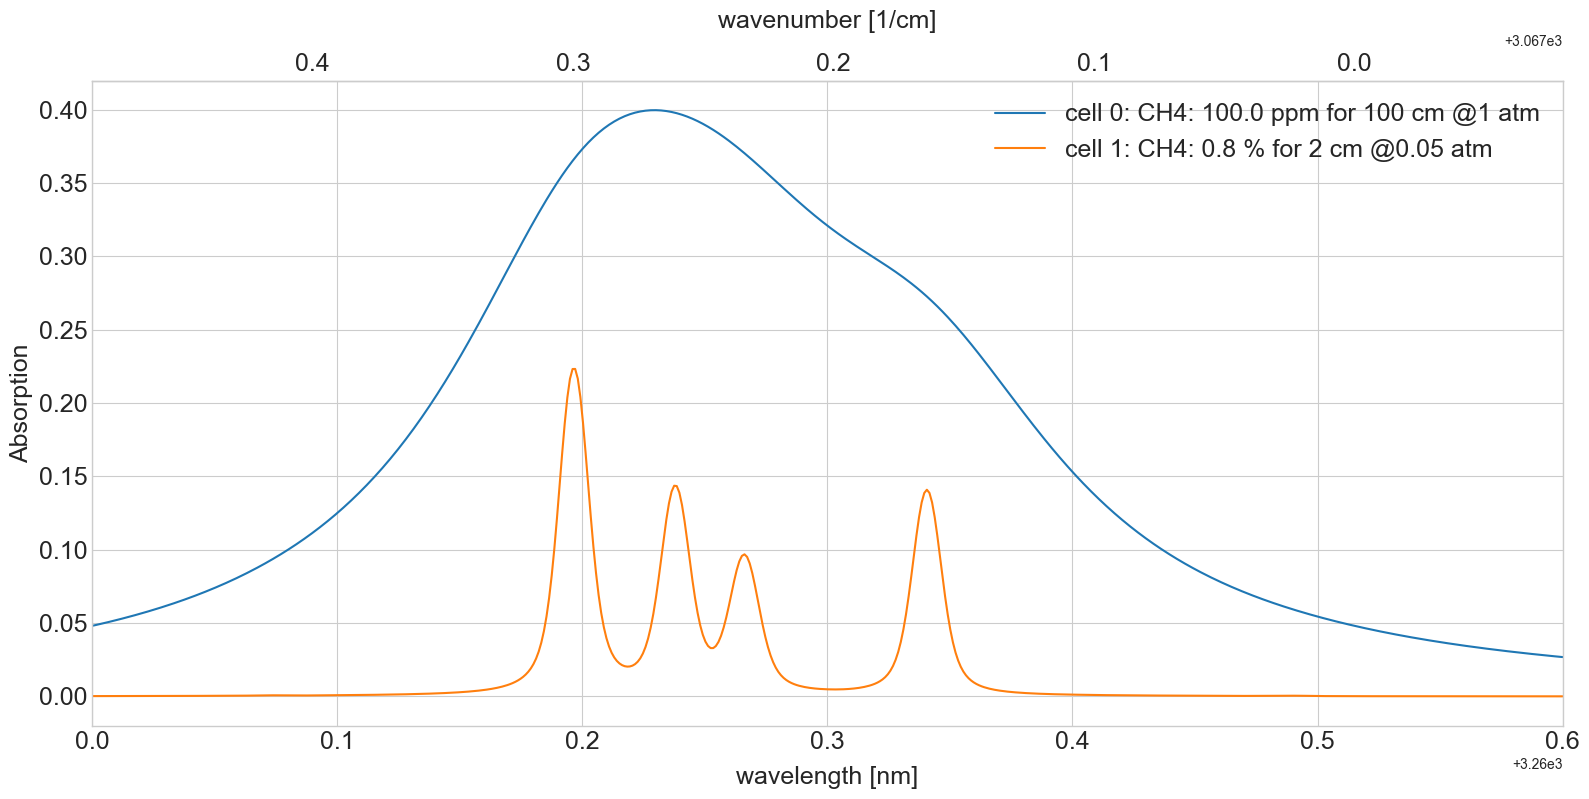

In [8]:
#%% 5. plot
my_spectrum.plot(figsize = (16,8),
                 export = True,
                 fontsize = 18,
                 absorbance = False,
                )
print(my_spectrum)

In [ ]:
#%% 6. export
# exports a text file containing the infomration about the spectrum and the gas cells.

my_spectrum.export(directory = 'exports') # default directory is 'exports'